<a href="https://colab.research.google.com/github/ninja03jod/Data_Science_Projects/blob/main/Case_Study_COVID_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/covid_19_clean_complete.csv")
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
# lets check the each columns dtype and null values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
# remove the state column:
df.drop(columns=["Province/State"],inplace=True)

In [ ]:
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df.rename(columns={"Country/Region":"Region"},inplace=True)

In [ ]:
df.info()
# memory consumed is 3.4 mb+

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Region      49068 non-null  object 
 1   Lat         49068 non-null  float64
 2   Long        49068 non-null  float64
 3   Date        49068 non-null  object 
 4   Confirmed   49068 non-null  int64  
 5   Deaths      49068 non-null  int64  
 6   Recovered   49068 non-null  int64  
 7   Active      49068 non-null  int64  
 8   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 3.4+ MB


In [ ]:
# change the dtype of country from object --> category
# category is also dtype
# category consume less memory than object dtype
df.Region = df.Region.astype("category")

In [ ]:
# cross checking:
df.info()
# memory usage reduced

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Region      49068 non-null  category
 1   Lat         49068 non-null  float64 
 2   Long        49068 non-null  float64 
 3   Date        49068 non-null  object  
 4   Confirmed   49068 non-null  int64   
 5   Deaths      49068 non-null  int64   
 6   Recovered   49068 non-null  int64   
 7   Active      49068 non-null  int64   
 8   WHO Region  49068 non-null  object  
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 3.1+ MB


In [ ]:
# reduce bitsize of float 64 to 32:
df.Lat = df.Lat.astype("float32")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Region      49068 non-null  category
 1   Lat         49068 non-null  float32 
 2   Long        49068 non-null  float64 
 3   Date        49068 non-null  object  
 4   Confirmed   49068 non-null  int64   
 5   Deaths      49068 non-null  int64   
 6   Recovered   49068 non-null  int64   
 7   Active      49068 non-null  int64   
 8   WHO Region  49068 non-null  object  
dtypes: category(1), float32(1), float64(1), int64(4), object(2)
memory usage: 2.9+ MB


In [ ]:
# check the head of df:
df.head()

,Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153301,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033899,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506302,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.tail()

,Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,Lesotho,-29.610001,28.233600,2020-07-27,505,12,128,365,Africa


In [ ]:
# check records for rows and column:
print(df.shape[0],"rows")
print(df.shape[1],"columns")

49068 rows
9 columns


In [ ]:
# fetch the cateorical columns:
df.select_dtypes(object).columns

Index(['Date', 'WHO Region'], dtype='object')

In [ ]:
# show the record of object dtypes
df.select_dtypes(object)

,Date,WHO Region
0,2020-01-22,Eastern Mediterranean
1,2020-01-22,Europe
2,2020-01-22,Africa
3,2020-01-22,Europe
4,2020-01-22,Africa
...,...,...
49063,2020-07-27,Africa
49064,2020-07-27,Eastern Mediterranean
49065,2020-07-27,Africa
49066,2020-07-27,Europe


In [ ]:
# if we wants some statistical info:
df.describe()
# Default it gives statistical info about int,flaot values

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433729,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950319,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796299,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634501,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706902,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [ ]:
# we can transpose it also
df.describe().T.style.background_gradient("cividis_r")

,count,mean,std,min,25%,50%,75%,max
Lat,49068.000000,21.433729,24.950319,-51.796299,7.873054,23.634501,41.204380,71.706902
Long,49068.000000,23.528236,70.442740,-135.000000,-15.310100,21.745300,80.771797,178.065000
Confirmed,49068.000000,16884.904255,127300.205272,0.000000,4.000000,168.000000,1518.250000,4290259.000000
Deaths,49068.000000,884.179160,6313.584411,0.000000,0.000000,2.000000,30.000000,148011.000000
Recovered,49068.000000,7915.713479,54800.918731,0.000000,0.000000,29.000000,666.000000,1846641.000000
Active,49068.000000,8085.011617,76258.903026,-14.000000,0.000000,26.000000,606.000000,2816444.000000


In [ ]:
# statistical info about object dtype
df.describe(include=object)

,Date,WHO Region
count,49068,49068
unique,188,6
top,2020-01-22,Europe
freq,261,15040


In [ ]:
# Provide statisitcal info for each dtypes
df.describe(include="all")

,Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
count,49068,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04,49068
unique,187,NaN,NaN,188,NaN,NaN,NaN,NaN,6
top,China,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,Europe
freq,6204,NaN,NaN,261,NaN,NaN,NaN,NaN,15040
mean,NaN,21.433729,23.528236,NaN,1.688490e+04,884.179160,7.915713e+03,8.085012e+03,NaN
std,NaN,24.950319,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04,NaN
min,NaN,-51.796299,-135.000000,NaN,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01,NaN
25%,NaN,7.873054,-15.310100,NaN,4.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
50%,NaN,23.634501,21.745300,NaN,1.680000e+02,2.000000,2.900000e+01,2.600000e+01,NaN
75%,NaN,41.204380,80.771797,NaN,1.518250e+03,30.000000,6.660000e+02,6.060000e+02,NaN


In [ ]:
df[:5]

,Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153301,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033899,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506302,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
# fetch how many deaths are done in each country
df.groupby("Region")[["Deaths"]].value_counts()

Region       Deaths
Afghanistan  0         60
             4          7
             1          3
             30         3
             36         2
                       ..
Zimbabwe     3210       0
             3212       0
             3213       0
             3215       0
             148011     0
Length: 680680, dtype: int64

In [ ]:
# How many countries are in data:
df.Region.value_counts().shape[0]

187

In [ ]:
# deaths in china:
df.query("Region=='China' and Deaths >0")

,Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
61,China,30.975599,112.2707,2020-01-22,444,17,28,399,Western Pacific
318,China,39.549000,116.1306,2020-01-23,1,1,0,0,Western Pacific
322,China,30.975599,112.2707,2020-01-23,444,17,28,399,Western Pacific
579,China,39.549000,116.1306,2020-01-24,2,1,0,1,Western Pacific
580,China,47.862000,127.7615,2020-01-24,4,1,0,3,Western Pacific
...,...,...,...,...,...,...,...,...,...
48882,China,30.617100,102.7103,2020-07-27,604,3,595,6,Western Pacific
48883,China,39.305401,117.3230,2020-07-27,204,3,195,6,Western Pacific
48885,China,41.112900,85.2401,2020-07-27,311,3,73,235,Western Pacific
48886,China,24.974001,101.4870,2020-07-27,190,2,186,2,Western Pacific


In [ ]:
# calculate how many deaths are happen in china

df.query("Region=='China' and Deaths >0")["Deaths"].sum()


672413

In [ ]:
df[df.Region == "China"][["Deaths"]].sum()

Deaths    672413
dtype: int64

In [ ]:
df[df.Region == "China"].Deaths.sum()

672413

In [ ]:
df.query("Region =='China'").Deaths.sum()

672413

In [ ]:
d = pd.read_csv("/content/covid_19_clean_complete.csv")
d

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
d.rename(columns={"Province/State":"State","Country/Region":"Region"},inplace=True)

In [ ]:
d

,State,Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
# Find the most deaths in each countries:
df.groupby("Region")[["Deaths"]].sum()

,Deaths
Region,
Afghanistan,49098
Albania,5708
Algeria,77972
Andorra,5423
Angola,1078
...,...
West Bank and Gaza,1370
Western Sahara,63
Yemen,17707


In [ ]:
# show record of deaths in each state with countries
d.groupby(["Region","State"])[["Deaths"]].sum()

Deaths
Region         State                               
Australia      Australian Capital Territory     339
               New South Wales                 5055
               Northern Territory                 0
               Queensland                       694
               South Australia                  440
...                                             ...
United Kingdom Falkland Islands (Malvinas)        0
               Gibraltar                          0
               Isle of Man                     2323
               Montserrat                        95
               Turks and Caicos Islands         142

[78 rows x 1 columns]

In [ ]:
# check the date max records of deaths in austrlia
d.query("Region=='Australia' and Deaths>0").sort_values(["Deaths"],ascending=False).head(1)

,State,Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48821,Victoria,Australia,-37.8136,144.9631,2020-07-27,9049,83,3817,5149,Western Pacific


In [ ]:
# check how many recoverd in china
df[df.Region == "China"][["Recovered"]].sum()

Recovered    11466866
dtype: int64

In [ ]:
# show the record of recovered in china
df[df.Region == "China"][["Recovered"]]

,Recovered
48,0
49,0
50,0
51,0
52,0
...,...
48883,195
48884,1
48885,73
48886,186


In [ ]:
d

,State,Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


Text(0.5, 1.0, 'COVID-19')

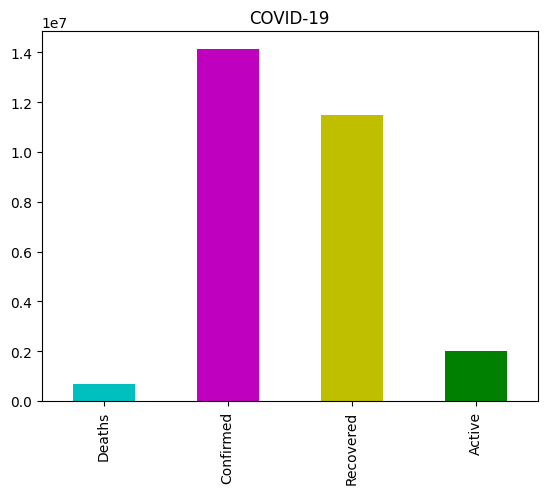

In [ ]:
# plot the bar plot for deaths, active , confirmed and recovered in china
df.query("Region=='China'")[["Deaths","Confirmed","Recovered","Active"]].sum().plot.bar(color=["c","m","y","g"])
plt.title("COVID-19")

In [ ]:
# how many are who region :
d.rename(columns={"WHO Region":"WHO_Region"},inplace=True)

In [ ]:
d[["WHO_Region"]].value_counts()

WHO_Region           
Europe                   15040
Western Pacific          10340
Africa                    9024
Americas                  8648
Eastern Mediterranean     4136
South-East Asia           1880
dtype: int64

Text(0.5, 1.0, 'COVID-19')

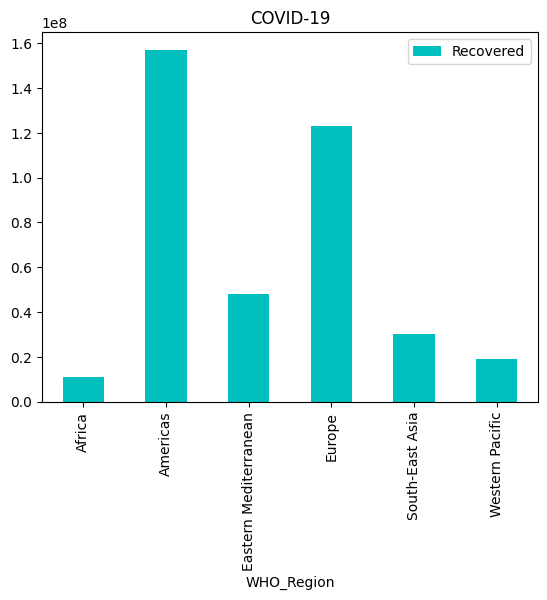

In [ ]:
# Plot the bar plot for recovered people in each WHO_Region

d.groupby(["WHO_Region"])[["Recovered"]].sum().plot.bar(color=["c","m","y","g","r","b"])
plt.title("COVID-19")

<Axes: >

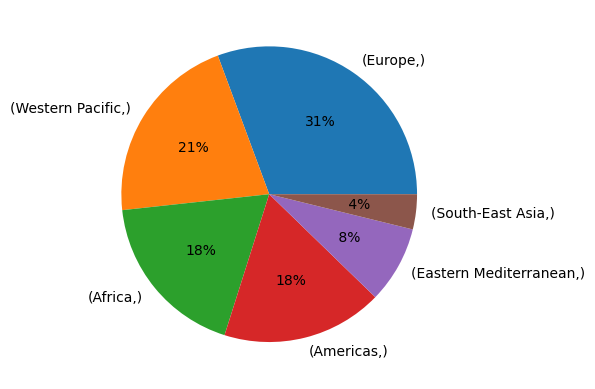

In [ ]:
# pie plot for each who region
d[["WHO_Region"]].value_counts().plot.pie(autopct="%2.f%%")

<Axes: ylabel='Deaths'>

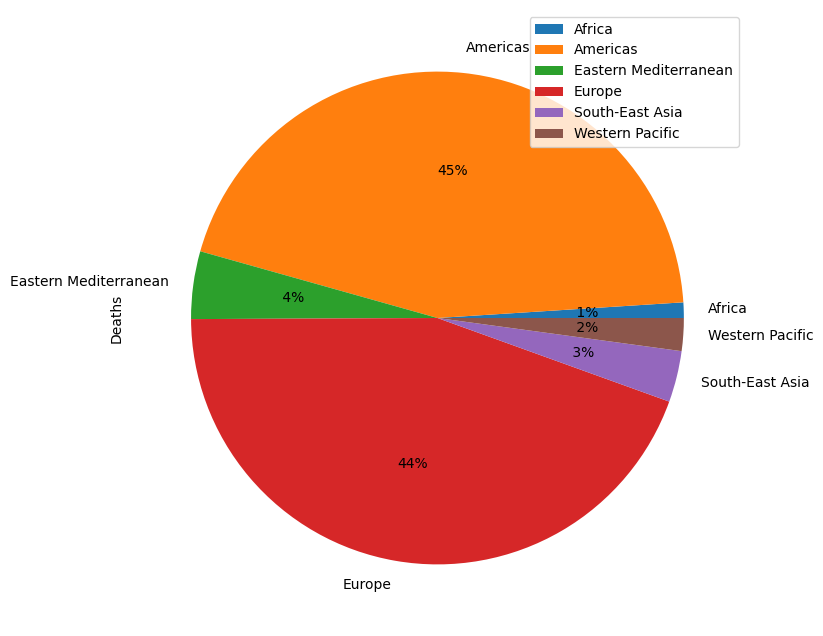

In [ ]:
# pie plot for deaths done in each region
d.groupby("WHO_Region")[["Deaths"]].sum().plot(kind="pie",y="Deaths",autopct="%2.f%%",figsize=(20,8))

In [ ]:
# load data sets:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
df = sns.load_dataset("brain_networks")
df

,network,1,1.1,2,2.1,3,3.1,4,4.1,5,...,16.5,16.6,16.7,17,17.1,17.2,17.3,17.4,17.5,17.6
0,node,1,1,1,1,1,1,1,1,1,...,3,4,4,1,1,2,2,3,3,4
1,hemi,lh,rh,lh,rh,lh,rh,lh,rh,lh,...,rh,lh,rh,lh,rh,lh,rh,lh,rh,lh
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,56.05574417114258,92.03103637695312,3.391575574874878,38.65968322753906,26.203819274902344,-49.71556854248047,47.4610366821289,26.746612548828125,-35.898860931396484,...,0.6079040169715881,-70.27054595947266,77.36577606201172,-21.73455047607422,1.0282527208328247,7.7917842864990225,68.90372467041016,-10.520872116088867,120.49046325683594,-39.686431884765625
4,1,55.5472526550293,43.6900749206543,-65.49598693847656,-13.974522590637207,-28.27496337890625,-39.05012893676758,-1.2106596231460571,-19.012897491455078,19.568010330200195,...,57.49507141113281,-76.39321899414062,127.26136016845705,-13.035799026489258,46.3818244934082,-15.752449989318848,31.00033187866211,-39.607521057128906,24.76401138305664,-36.7710075378418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,915,-7.4295125007629395,-4.81321907043457,-3.670536518096924,1.4422610998153689,-19.6804313659668,-29.109355926513672,-3.3765623569488525,-8.764892578125,0.017911728471517563,...,58.28579330444336,68.55741119384766,22.83304786682129,76.17948913574219,51.9346694946289,-6.614512920379639,-6.690762042999268,22.893030166625977,48.27437973022461,76.22845458984375
919,916,-33.55413818359375,-38.60562133789063,-25.66480255126953,-30.252351760864254,5.5627851486206055,20.182186126708984,17.91124725341797,24.65358161926269,-32.93561172485352,...,59.86481857299805,23.00457763671875,7.6574625968933105,50.96239852905274,13.696922302246096,63.50361633300781,57.40117645263672,24.97454833984375,51.97215270996094,64.53878784179689
920,917,-78.53956604003906,-74.19718933105469,-54.04159545898438,-39.97029113769531,-14.277058601379395,-30.606460571289066,60.62852096557617,62.02702331542969,-32.80055618286133,...,68.76786804199219,49.66401672363281,64.55149841308594,43.80074691772461,8.144479751586914,47.28145980834961,70.49964904785156,66.99440002441406,81.53924560546875,64.96977233886719
921,918,-103.23582458496094,-98.7442855834961,-40.10954284667969,-44.90773391723633,12.109148025512695,1.6213401556015017,33.765560150146484,55.35607147216797,-14.330512046813965,...,103.1552505493164,106.45484924316406,9.04682731628418,46.67441940307617,40.95479583740234,0.8771800398826599,37.57715225219727,20.517745971679688,3.124434232711792,56.71838760375977
